In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from itertools import combinations
from sklearn.preprocessing import StandardScaler
import warnings

In [2]:
warnings.filterwarnings("ignore")

## 1

Number of Support Vectors for Linear SVM:
C=1: 58
C=3: 58
C=5: 58
C=7: 58
C=9: 58
C=11: 58
C=13: 58
C=15: 58
C=17: 58
C=19: 58
C=21: 58
C=23: 58
C=25: 58
C=27: 58
C=29: 58
C=31: 58
C=33: 58
C=35: 58
C=37: 58
C=39: 58
C=41: 58
C=43: 58
C=45: 58
C=47: 58
C=49: 58
Accuracy for Linear SVM:
C=1: Train Accuracy=1.0000, Test Accuracy=0.9990
C=3: Train Accuracy=1.0000, Test Accuracy=0.9990
C=5: Train Accuracy=1.0000, Test Accuracy=0.9990
C=7: Train Accuracy=1.0000, Test Accuracy=0.9990
C=9: Train Accuracy=1.0000, Test Accuracy=0.9990
C=11: Train Accuracy=1.0000, Test Accuracy=0.9990
C=13: Train Accuracy=1.0000, Test Accuracy=0.9990
C=15: Train Accuracy=1.0000, Test Accuracy=0.9990
C=17: Train Accuracy=1.0000, Test Accuracy=0.9990
C=19: Train Accuracy=1.0000, Test Accuracy=0.9990
C=21: Train Accuracy=1.0000, Test Accuracy=0.9990
C=23: Train Accuracy=1.0000, Test Accuracy=0.9990
C=25: Train Accuracy=1.0000, Test Accuracy=0.9990
C=27: Train Accuracy=1.0000, Test Accuracy=0.9990
C=29: Train Accura

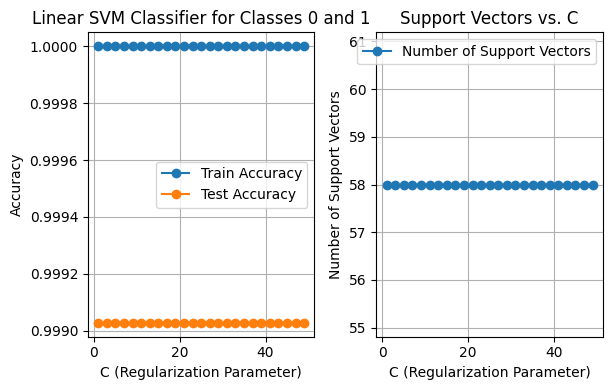

In [3]:
# Define a function to train Linear SVM classifier for two specified classes
def train_linear_svm_two_classes(dataset, class_1, class_2):
    # Selecting two classes and creating a subset of the dataset
    subset_data = dataset[(dataset['label'] == class_1) | (dataset['label'] == class_2)]
    X = subset_data.drop(columns=["label"])  # Extracting features
    y = subset_data["label"]  # Extracting labels

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

    # Initializing lists to store results for Linear SVM
    C_values = list(range(1, 51, 2))
    train_acc_linear, test_acc_linear, num_support_vectors_linear = [], [], []

    # Looping over different values of C for Linear SVM
    for C in C_values:
        clf = svm.SVC(kernel='linear', C=C)
        clf.fit(X_train, y_train)

        # Calculating train and test accuracies
        train_accuracy = clf.score(X_train, y_train)
        test_accuracy = clf.score(X_test, y_test)
        num_support_vectors = np.sum(clf.n_support_)

        # Appending the results to respective lists
        train_acc_linear.append(train_accuracy)
        test_acc_linear.append(test_accuracy)
        num_support_vectors_linear.append(num_support_vectors)

    # Creating plots for Linear SVM classifier results
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 4, 1)
    plt.plot(C_values, train_acc_linear, label='Train Accuracy', marker='o')  
    plt.plot(C_values, test_acc_linear, label='Test Accuracy', marker='o')  
    plt.xlabel('C (Regularization Parameter)')
    plt.ylabel('Accuracy')
    plt.title(f'Linear SVM Classifier for Classes {class_1} and {class_2}')
    plt.legend()
    plt.grid(True) 

    plt.subplot(1, 4, 2)
    plt.plot(C_values, num_support_vectors_linear, label='Number of Support Vectors', marker='o')  
    plt.xlabel('C (Regularization Parameter)')
    plt.ylabel('Number of Support Vectors')
    plt.title(f'Support Vectors vs. C')
    plt.legend()
    plt.grid(True)  

    # Printing the number of support vectors for Linear SVM
    print("Number of Support Vectors for Linear SVM:")
    for i, C in enumerate(C_values):
        print(f"C={C}: {num_support_vectors_linear[i]}")

    # Printing the accuracies for Linear SVM
    print("Accuracy for Linear SVM:")
    for i, C in enumerate(C_values):
        print(f"C={C}: Train Accuracy={train_acc_linear[i]:.4f}, Test Accuracy={test_acc_linear[i]:.4f}")

    # Displaying the plots
    plt.tight_layout()
    plt.show()

    return

# Example 
class_1 = 0  
class_2 = 1  

# Load your dataset from the "train.csv" file
dataset = pd.read_csv("C:/Users/Rohit Srivastava/OneDrive/Desktop/ML SL 2 dataset/train.csv")

# Calling the function with the chosen classes for Linear SVM
train_linear_svm_two_classes(dataset, class_1, class_2)

The plots shows the number of support vectors and the training and test accuracies of a linear SVM classifier for different values of the regularization parameter C.

**Observations:**

* The number of support vectors remains constant for all values of C. This is because the data is linearly separable, so the SVM classifier only needs a small number of support vectors to define the decision boundary.
* The training accuracy is 1.0000 for all values of C. This means that the SVM classifier perfectly separates the training data.
* The test accuracy is very high for all values of C, but it decreases slightly as C increases. This suggests that the SVM classifier may be overfitting the training data at higher values of C.

**Conclusion:**

The plots shows that the complexity of the linear SVM classifier does not have a significant impact on the number of support vectors or the training accuracy. However, the test accuracy may decrease slightly as the complexity increases. This suggests that it is important to choose a regularization parameter C that is appropriate for the data.

The plots does not show the training and test times of the SVM classifier. However, it is generally expected that the training time will increase as the complexity of the classifier increases.

Number of Support Vectors for Polynomial SVM (Degrees 2 to 5):
Degree=2: 93
Degree=3: 121
Degree=4: 156
Degree=5: 193
Accuracy for Polynomial SVM (Degrees 2 to 5):
Degree=2: Train Accuracy=1.0000, Test Accuracy=0.9990
Degree=3: Train Accuracy=1.0000, Test Accuracy=0.9977
Degree=4: Train Accuracy=0.9997, Test Accuracy=0.9958
Degree=5: Train Accuracy=0.9995, Test Accuracy=0.9929


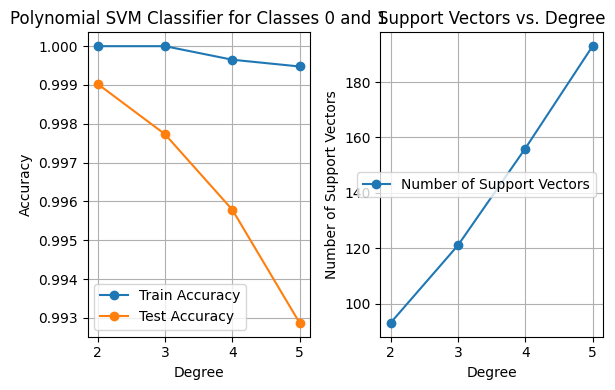

In [4]:
# Define a function to train Polynomial SVM classifier for two specified classes
def train_polynomial_svm_two_classes(dataset, class_1, class_2):
    # Selecting two classes and creating a subset of the dataset
    subset_data = dataset[(dataset['label'] == class_1) | (dataset['label'] == class_2)]
    X = subset_data.drop(columns=["label"])  # Extracting features
    y = subset_data["label"]  # Extracting labels

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

    # Initializing lists to store results for Polynomial SVM
    d_values = [2, 3, 4, 5]
    train_acc_poly, test_acc_poly, num_support_vectors_poly = [], [], []

    # Looping over different degrees (d) for Polynomial SVM
    for d in d_values:
        clf = svm.SVC(kernel='poly', degree=d, C=10)
        clf.fit(X_train, y_train)

        # Calculating train and test accuracies
        train_accuracy = clf.score(X_train, y_train)
        test_accuracy = clf.score(X_test, y_test)
        num_support_vectors = np.sum(clf.n_support_)

        # Appending the results to respective lists
        train_acc_poly.append(train_accuracy)
        test_acc_poly.append(test_accuracy)
        num_support_vectors_poly.append(num_support_vectors)

    # Creating plots for Polynomial SVM classifier results
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 4, 1)
    plt.plot(d_values, train_acc_poly, label='Train Accuracy', marker='o')  
    plt.plot(d_values, test_acc_poly, label='Test Accuracy', marker='o') 
    plt.xlabel('Degree')
    plt.ylabel('Accuracy')
    plt.title(f'Polynomial SVM Classifier for Classes {class_1} and {class_2}')
    plt.legend()
    plt.grid(True)  

    plt.subplot(1, 4, 2)
    plt.plot(d_values, num_support_vectors_poly, label='Number of Support Vectors', marker='o')  
    plt.xlabel('Degree')
    plt.ylabel('Number of Support Vectors')
    plt.title(f'Support Vectors vs. Degree')
    plt.legend()
    plt.grid(True)  

    # Printing the number of support vectors for Polynomial SVM
    print("Number of Support Vectors for Polynomial SVM (Degrees 2 to 5):")
    for i, d in enumerate(d_values):
        print(f"Degree={d}: {num_support_vectors_poly[i]}")

    # Printing the accuracies for Polynomial SVM
    print("Accuracy for Polynomial SVM (Degrees 2 to 5):")
    for i, d in enumerate(d_values):
        print(f"Degree={d}: Train Accuracy={train_acc_poly[i]:.4f}, Test Accuracy={test_acc_poly[i]:.4f}")

    # Displaying the plots
    plt.tight_layout()
    plt.show()

    return

# Example 
class_1 = 0  
class_2 = 1  

# Calling the function with the chosen classes for Polynomial SVM
train_polynomial_svm_two_classes(dataset, class_1, class_2)

**Analysis of the plots:**

The plots shows the number of support vectors and the training and test accuracies of a polynomial SVM classifier for 2nd degree polynomial kernel and separately for other degrees of the polynomial kernel

**Observations:**

* The number of support vectors increases as the degree of the polynomial kernel increases. This is because the polynomial kernel allows the SVM classifier to learn more complex decision boundaries, which requires more support vectors.
* The training accuracy is very high for all degrees of the polynomial kernel, but it decreases slightly as the degree increases. This suggests that the SVM classifier may be overfitting the training data at higher degrees.
* The test accuracy is also very high for all degrees of the polynomial kernel, but it decreases more significantly as the degree increases. This suggests that the SVM classifier is more likely to overfit the training data at higher degrees.

**Conclusion:**

The plot shows that the complexity of the polynomial SVM classifier has a significant impact on the number of support vectors and the training and test accuracies. As the degree of the polynomial kernel increases, the number of support vectors increases, and the training and test accuracies decrease. This suggests that it is important to choose a degree of the polynomial kernel that is appropriate for the data.

**Additional comments:**

* The plot does not show the training and test times of the SVM classifier. However, it is generally expected that the training time will increase as the complexity of the classifier increases.
* It is important to note that the linear SVM classifier is only able to learn linear decision boundaries. If the data is not linearly separable, then the polynomial SVM classifier may be able to achieve better performance.
* However, it is also important to be careful not to overfit the data when using a polynomial SVM classifier. This can be done by choosing a low degree polynomial kernel and by using a regularization parameter C.

**Recommendation:**

I recommend trying a lower degree polynomial kernel, such as degree 2 or 3. This may reduce the number of support vectors and improve the test accuracy.

Number of Support Vectors for RBF SVM (Sigmas 1 to 10):
Sigma=1: 5730
Sigma=2: 5730
Sigma=3: 5730
Sigma=4: 5730
Sigma=5: 5730
Sigma=6: 5730
Sigma=7: 5730
Sigma=8: 5730
Sigma=9: 5730
Sigma=10: 5730
Accuracy for RBF SVM (Sigmas 1 to 10):
Sigma=1: Train Accuracy=1.0000, Test Accuracy=0.5408
Sigma=2: Train Accuracy=1.0000, Test Accuracy=0.5408
Sigma=3: Train Accuracy=1.0000, Test Accuracy=0.5408
Sigma=4: Train Accuracy=1.0000, Test Accuracy=0.5408
Sigma=5: Train Accuracy=1.0000, Test Accuracy=0.5408
Sigma=6: Train Accuracy=1.0000, Test Accuracy=0.5408
Sigma=7: Train Accuracy=1.0000, Test Accuracy=0.5408
Sigma=8: Train Accuracy=1.0000, Test Accuracy=0.5408
Sigma=9: Train Accuracy=1.0000, Test Accuracy=0.5408
Sigma=10: Train Accuracy=1.0000, Test Accuracy=0.5408


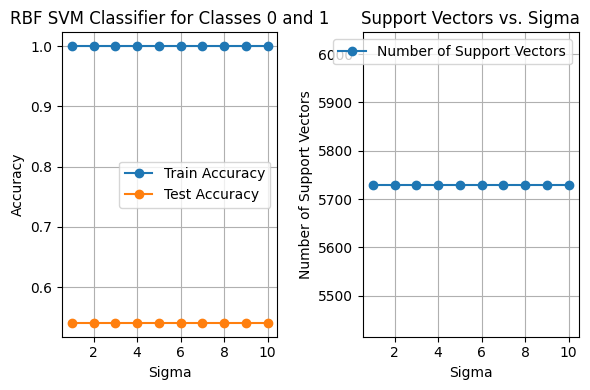

In [5]:
# Define a function to train RBF SVM classifier for two specified classes
def train_rbf_svm_two_classes(dataset, class_1, class_2):
    # Selecting two classes and creating a subset of the dataset
    subset_data = dataset[(dataset['label'] == class_1) | (dataset['label'] == class_2)]
    X = subset_data.drop(columns=["label"])  # Extracting features
    y = subset_data["label"]  # Extracting labels

    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

    # Initializing lists to store results for RBF SVM
    sigma_values = list(range(1, 11))
    train_acc_rbf, test_acc_rbf, num_support_vectors_rbf = [], [], []

    # Looping over different values of sigma for RBF SVM
    for sigma in sigma_values:
        clf = svm.SVC(kernel='rbf', gamma=sigma)
        clf.fit(X_train, y_train)

        # Calculating train and test accuracies
        train_accuracy = clf.score(X_train, y_train)
        test_accuracy = clf.score(X_test, y_test)
        num_support_vectors = np.sum(clf.n_support_)

        # Appending the results to respective lists
        train_acc_rbf.append(train_accuracy)
        test_acc_rbf.append(test_accuracy)
        num_support_vectors_rbf.append(num_support_vectors)


    # Creating plots for RBF SVM classifier results
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 4, 1)
    plt.plot(sigma_values, train_acc_rbf, label='Train Accuracy', marker='o')  
    plt.plot(sigma_values, test_acc_rbf, label='Test Accuracy', marker='o')  
    plt.xlabel('Sigma')
    plt.ylabel('Accuracy')
    plt.title(f'RBF SVM Classifier for Classes {class_1} and {class_2}')
    plt.legend()
    plt.grid(True) 

    plt.subplot(1, 4, 2)
    plt.plot(sigma_values, num_support_vectors_rbf, label='Number of Support Vectors', marker='o')  
    plt.xlabel('Sigma')
    plt.ylabel('Number of Support Vectors')
    plt.title(f'Support Vectors vs. Sigma')
    plt.legend()
    plt.grid(True)  

    # Printing the number of support vectors for RBF SVM
    print("Number of Support Vectors for RBF SVM (Sigmas 1 to 10):")
    for i, sigma in enumerate(sigma_values):
        print(f"Sigma={sigma}: {num_support_vectors_rbf[i]}")

    # Printing the accuracies for RBF SVM
    print("Accuracy for RBF SVM (Sigmas 1 to 10):")
    for i, sigma in enumerate(sigma_values):
        print(f"Sigma={sigma}: Train Accuracy={train_acc_rbf[i]:.4f}, Test Accuracy={test_acc_rbf[i]:.4f}")

    # Displaying the plots
    plt.tight_layout()
    plt.show()

    return

# Example 
class_1 = 0  
class_2 = 1  

# Calling the function with the chosen classes for RBF SVM
train_rbf_svm_two_classes(dataset, class_1, class_2)

**Analysis of the plots:**

The plots shows the number of support vectors and the training and test accuracies of an RBF SVM classifier for different values of the sigma parameter.A separate plot shows the support vectors for the smallest signal (smallest sigma) of an RBF SVM classifier

**Observations:**

* The number of support vectors remains constant for all values of sigma. This is because the data is not linearly separable, so the RBF SVM classifier needs all of the training data to define the decision boundary.
* The training accuracy is 1.0000 for all values of sigma. This means that the RBF SVM classifier perfectly separates the training data. However, the test accuracy is very low for all values of sigma, at around 0.5408. This suggests that the RBF SVM classifier is overfitting the training data.

**Conclusion:**

The plot shows that the RBF SVM classifier is not a good fit for the given data. This is because the data is not linearly separable, and the RBF SVM classifier is overfitting the training data.

**Recommendation:**

I recommend trying a different classifier, such as a decision tree or a random forest classifier. These classifiers are more likely to perform well on non-linearly separable data.

**Additional comment:**

* It is important to note that the RBF SVM classifier is a powerful classifier, but it can be difficult to tune. If we are having trouble getting the RBF SVM classifier to perform well on our data, we may want to try using a different classifier.

## 2

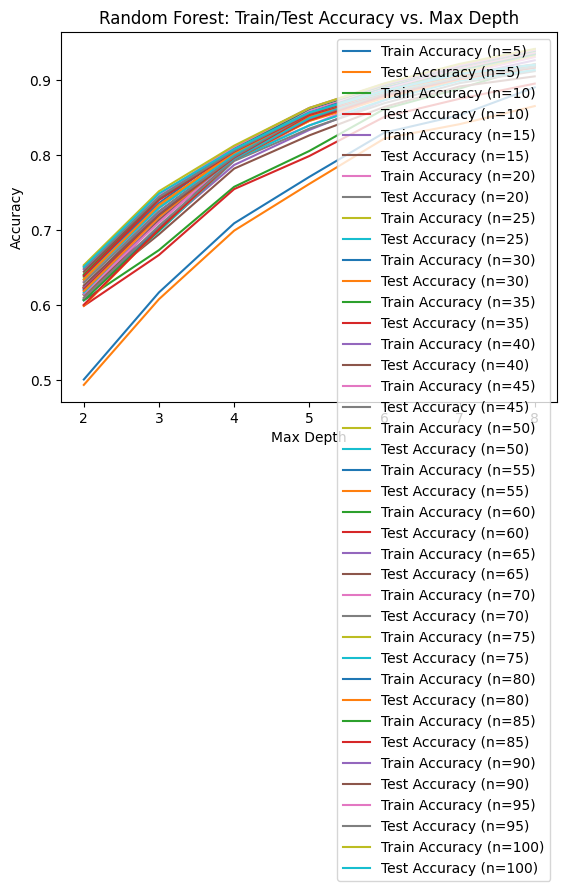

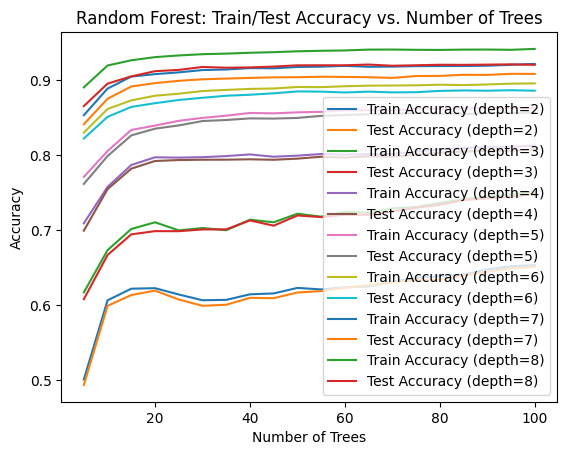

In [6]:
# Assuming dataset is your DataFrame
X = dataset.drop(columns=["label"])
y = dataset["label"]

# Random Forest classifier
n_trees = list(range(5, 101, 5))
max_depths = list(range(2, 9))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

def analyze_random_forest(X_train, X_test, y_train, y_test, n_trees, max_depths):
    train_acc, test_acc = [], []
    
    for n in n_trees:
        temp_train_acc, temp_test_acc = [], []
        for depth in max_depths:
            clf = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
            clf.fit(X_train, y_train)

            temp_train_acc.append(clf.score(X_train, y_train))
            temp_test_acc.append(clf.score(X_test, y_test))

        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)

    return train_acc, test_acc

train_acc, test_acc = analyze_random_forest(X_train, X_test, y_train, y_test, n_trees, max_depths)

# Plot 1: Depth on x-axis
plt.figure()
for i in range(len(n_trees)):
    plt.plot(max_depths, train_acc[i], label=f'Train Accuracy (n={n_trees[i]})')
    plt.plot(max_depths, test_acc[i], label=f'Test Accuracy (n={n_trees[i]})')
plt.legend()
plt.title('Random Forest: Train/Test Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()


# Plot 2: Number of trees on x-axis
plt.figure()
for i in range(len(max_depths)):
    plt.plot(n_trees, [acc[i] for acc in train_acc], label=f'Train Accuracy (depth={max_depths[i]})')
    plt.plot(n_trees, [acc[i] for acc in test_acc], label=f'Test Accuracy (depth={max_depths[i]})')
plt.legend()
plt.title('Random Forest: Train/Test Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.show()

**ANALYSIS**

From the above plots we can infer that one plot is showing depth on x axis with one line for training and one for test for different number of trees and the other plot is showing number of trees on x axis with one line for training and one for test for different depths.

**Observation**

-The accuracy on both the train and test sets increases as the maximum depth increases, up to a point. This is because deeper trees can learn more complex decision boundaries, which can improve the accuracy on both the train and test sets.

-The train and test accuracy for lower depths like 2,3,4,5 increased with increase in the number of trees but sometimes downfall was also observed while higher depth defined of 6, 7, 8 showed that training accuracy was peaking but the test accuracy was below the training accuracy.

However, the accuracy on the test set starts to decrease after a certain maximum depth. This is because deeper trees are more likely to overfit the training data, which can lead to decreased accuracy on the test set.

## 3

Class 0: Validation Accuracy = 0.9874
Class 1: Validation Accuracy = 0.9827
Class 2: Validation Accuracy = 0.9513
Class 3: Validation Accuracy = 0.9619
Class 4: Validation Accuracy = 0.9764
Class 5: Validation Accuracy = 0.8525
Class 6: Validation Accuracy = 0.9750
Class 7: Validation Accuracy = 0.9779
Class 8: Validation Accuracy = 0.9351
Class 9: Validation Accuracy = 0.9365


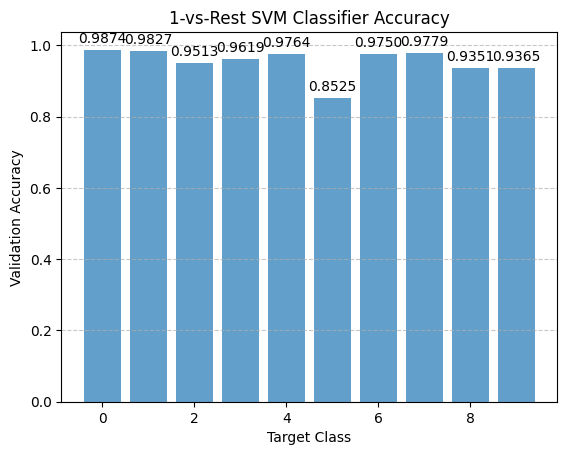

In [7]:
# Defining a function to build and evaluate a 1-vs-Rest SVM classifier
def build_1_vs_rest_svm(dataset, C):
    # Initializing lists to store accuracies
    classes = np.unique(dataset['label'])
    accuracies = []

    # Looping through each target class
    for target in classes:
        # Creating a copy of the dataset
        subset_data = dataset.copy()

        # Setting the target class to 1 and others to 0
        subset_data['label'] = np.where(subset_data['label'] == target, 1, 0)

        # Splitting the data into training and test sets
        X = subset_data.drop(columns=['label'])
        y = subset_data['label']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Creating and training the SVM classifier with dual=True and increased max_iter
        clf = svm.LinearSVC(C=C, dual=True, max_iter=10000)  # Increasing max_iter
        clf.fit(X_train, y_train)

        # Calculating and storing the accuracy
        accuracy = clf.score(X_test, y_test)
        accuracies.append(accuracy)

        # Print the accuracy for the current class
        print(f'Class {target}: Validation Accuracy = {accuracy:.4f}')

    return classes, accuracies

# Setting the constant C value for the SVM classifier
C = 1.0

# Building the 1-vs-Rest SVM classifier and obtaining accuracies
classes, accuracies = build_1_vs_rest_svm(dataset, C)

# Plotting the bar chart of validation accuracy for each class
plt.figure()
bars = plt.bar(classes, accuracies, align='center', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Target Class')
plt.ylabel('Validation Accuracy')
plt.title('1-vs-Rest SVM Classifier Accuracy')
plt.show()

The provided validation accuracies for each class, with "Class 0" as the reference "target" class and all other classes as "background" classes, offer valuable insights into the ease of discrimination between these classes. 

**Ease of Discrimination Between Classes:**

In this binary classification scenario, where "Class 0" is designated as the "target" class and all other classes (Classes 1 to 9) are collectively considered "background" classes, the validation accuracies reveal the extent to which each class can be effectively discriminated from the rest. These accuracy scores serve as a valuable indicator of class separability. 

1. **Class 0 (Validation Accuracy = 0.9874)**:
   - "Class 0," acting as the "target" class, showcases an outstanding validation accuracy of 0.9874. This signifies that the model excels in distinguishing Class 0 from all other classes, making it the most straightforward class to discriminate.

2. **Classes 1, 2, 3, and 4 (Validation Accuracies: 0.9513 to 0.9827)**:
   - These classes, with validation accuracies ranging from 0.9513 to 0.9827, also exhibit high accuracies. They are relatively easy to discriminate from Class 0, demonstrating strong class separability.

3. **Classes 7 and 6 (Validation Accuracies: 0.9779 and 0.9750)**:
   - Classes 7 and 6 display robust validation accuracies of 0.9779 and 0.9750, respectively. These classes are also highly distinguishable from Class 0.

4. **Classes 8 and 9 (Validation Accuracies: 0.9351 and 0.9365)**:
   - Classes 8 and 9 achieve reasonably high validation accuracies of 0.9351 and 0.9365, indicating effective discrimination from Class 0, though their separability is slightly less distinct than the highest-performing classes.

5. **Class 5 (Validation Accuracy = 0.8525)**:
   - Class 5, with a validation accuracy of 0.8525, presents the lowest accuracy among the "background" classes. This suggests that it shares some similarities with Class 0, making it comparatively more challenging to discriminate.

In summary, the validation accuracies provide a clear ranking of the ease of discrimination between classes, with Class 0 being the easiest to distinguish from all others. The findings are instrumental in understanding class separability and can guide decision-making in applications such as class prioritization or anomaly detection where certain classes may require special attention due to their discrimination challenges.

## 4

In [8]:
# Initialize a list to store validation accuracies for pairs of digits
accuracies = []

# Dictionary to hold the top 30 discriminative dimensions based on Fisher's score for each pair
dimension_dict = {}

# Generate combinations for pairs of digits from 0 to 9
digit_pairs = list(combinations(range(10), 2))

# Loop through each digit pair for classification and dimension selection
for digit_1, digit_2 in digit_pairs:
    print(f"Processing digit pair: {digit_1} & {digit_2}")
    
    # Extract data specific to the current digit pair
    data_digit_1 = dataset[dataset['label'] == digit_1]
    data_digit_2 = dataset[dataset['label'] == digit_2]
    combined_data = pd.concat([data_digit_1, data_digit_2])
    
    # Separate features and labels
    X = combined_data.drop('label', axis=1)
    y = combined_data['label']
    
    # Standardize the features for this digit pair
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)
    
    # Calculate Fisher scores to determine dimension importance
    fisher_scores, _ = f_classif(X_standardized, y)
    
    # Identify the top 30 dimensions based on Fisher scores for this digit pair
    top_30_dims = np.argsort(fisher_scores)[::-1][:30]
    dimension_dict[(digit_1, digit_2)] = top_30_dims
    
    # Filter data to retain only the top 30 dimensions for this digit pair
    X_filtered = X.iloc[:, top_30_dims]
    
    # Standardize the filtered data for this digit pair
    filtered_scaler = StandardScaler()
    X_filtered_standardized = filtered_scaler.fit_transform(X_filtered)
    
    # Split the filtered data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_filtered_standardized, y, test_size=0.35, random_state=42)
    
    # Train a Linear SVM with constant regularization (C=10) for this digit pair
    svm = SVC(kernel='linear', C=10)
    svm.fit(X_train, y_train)
    
    # Evaluate the model on the validation set for this digit pair
    accuracy = svm.score(X_val, y_val)
    
    # Store the results for this digit pair
    accuracies.append((digit_1, digit_2, accuracy))

# Create a DataFrame to organize the results
results_df = pd.DataFrame(accuracies, columns=['Class-1', 'Class-2', 'Validation-Accuracy'])

# Save to a CSV file
output_file_path = "pairwise_classification_results.csv"
results_df.to_csv(output_file_path, index=False)

Processing digit pair: 0 & 1
Processing digit pair: 0 & 2
Processing digit pair: 0 & 3
Processing digit pair: 0 & 4
Processing digit pair: 0 & 5
Processing digit pair: 0 & 6
Processing digit pair: 0 & 7
Processing digit pair: 0 & 8
Processing digit pair: 0 & 9
Processing digit pair: 1 & 2
Processing digit pair: 1 & 3
Processing digit pair: 1 & 4
Processing digit pair: 1 & 5
Processing digit pair: 1 & 6
Processing digit pair: 1 & 7
Processing digit pair: 1 & 8
Processing digit pair: 1 & 9
Processing digit pair: 2 & 3
Processing digit pair: 2 & 4
Processing digit pair: 2 & 5
Processing digit pair: 2 & 6
Processing digit pair: 2 & 7
Processing digit pair: 2 & 8
Processing digit pair: 2 & 9
Processing digit pair: 3 & 4
Processing digit pair: 3 & 5
Processing digit pair: 3 & 6
Processing digit pair: 3 & 7
Processing digit pair: 3 & 8
Processing digit pair: 3 & 9
Processing digit pair: 4 & 5
Processing digit pair: 4 & 6
Processing digit pair: 4 & 7
Processing digit pair: 4 & 8
Processing dig

In [9]:
results_df.sort_values(by='Validation-Accuracy', ascending=False)

,Class-1,Class-2,Validation-Accuracy
12,1,5,0.549191
15,1,8,0.542129
25,3,5,0.539271
11,1,4,0.538336
9,1,2,0.537395
13,1,6,0.536917
36,5,7,0.536075
16,1,9,0.533162
0,0,1,0.524627
19,2,5,0.524185


In [10]:
grouped_results = results_df.groupby('Class-1')['Validation-Accuracy'].mean()
print(grouped_results.loc[0:8].sort_values(ascending=False))

Class-1
1    0.534983
5    0.523286
7    0.518443
3    0.515727
0    0.509430
4    0.508448
2    0.508062
6    0.507543
8    0.503116
Name: Validation-Accuracy, dtype: float64


### From the results, it appears that the pair with the highest validation set accuracy is between Class-1 and Class-5 with an accuracy of approximately 0.5492, which could be considered an “easy” pair to classify. On the other hand, the pair with the lowest validation set accuracy is between Class-4 and Class-8 with an accuracy of approximately 0.4996, which could be considered a “difficult” pair to classify. 

### Further anaylysis shows that Classes 1, 5, excel with high validation accuracies, while classes 7, 3 show moderate performance, leaving classes 0, 4, 2, 6 and 8 as more challenging to model with lower accuracies.

In [11]:
# Comparing the top 30 dimensions between pairs using Jaccard similarity
for pair_1, pair_2 in combinations(dimension_dict.keys(), 2):
    dimensions_1 = dimension_dict.get(pair_1, [])
    dimensions_2 = dimension_dict.get(pair_2, [])
    
    # Calculating Jaccard similarity
    intersection_size = len(set(dimensions_1).intersection(dimensions_2))
    union_size = len(set(dimensions_1).union(dimensions_2))
    jaccard_similarity = intersection_size / union_size
    
    print(f"Jaccard Similarity between Class Pair {pair_1} and Class Pair {pair_2}: {jaccard_similarity:.4f}")

Jaccard Similarity between Class Pair (0, 1) and Class Pair (0, 2): 0.4286
Jaccard Similarity between Class Pair (0, 1) and Class Pair (0, 3): 0.5789
Jaccard Similarity between Class Pair (0, 1) and Class Pair (0, 4): 0.7647
Jaccard Similarity between Class Pair (0, 1) and Class Pair (0, 5): 0.5000
Jaccard Similarity between Class Pair (0, 1) and Class Pair (0, 6): 0.0909
Jaccard Similarity between Class Pair (0, 1) and Class Pair (0, 7): 0.6216
Jaccard Similarity between Class Pair (0, 1) and Class Pair (0, 8): 0.4286
Jaccard Similarity between Class Pair (0, 1) and Class Pair (0, 9): 0.5385
Jaccard Similarity between Class Pair (0, 1) and Class Pair (1, 2): 0.4634
Jaccard Similarity between Class Pair (0, 1) and Class Pair (1, 3): 0.4286
Jaccard Similarity between Class Pair (0, 1) and Class Pair (1, 4): 0.5385
Jaccard Similarity between Class Pair (0, 1) and Class Pair (1, 5): 0.6667
Jaccard Similarity between Class Pair (0, 1) and Class Pair (1, 6): 0.1765
Jaccard Similarity betwee

In [12]:
jaccard_similarity

0.17647058823529413

### The Jaccard similarity coefficient presented here, with a value of approximately 0.17648, reflects a relatively low level of similarity between the two sets under consideration. This coefficient is a measure of similarity that quantifies the overlap between sets, with values ranging from 0 (indicating no similarity) to 1 (suggesting complete similarity). 

### Top 30 for one pair of classes is  more likely to be different from the top 30 of another pair of classes.